# fmu.sumo.explorer

Package for browsing cases and surfaces in Sumo.

In [1]:
from fmu.sumo.explorer import Explorer
import xtgeo
from io import BytesIO
%matplotlib inline

2022-03-16 12:09:37 INFO     Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-03-16 12:09:37 INFO     NumExpr defaulting to 8 threads.


## Class: Explorer
Search for cases in SUMO

Methods:
- get_fields()
- get_users()
- get_status()
- get_cases()

In [2]:
sumo = Explorer(env="dev", write_back=True)

2022-03-16 12:09:38 DEBUG    Initialize Auth
2022-03-16 12:09:38 DEBUG    client_id is 1826bd7c-582f-4838-880d-5b4da5c3eea2
2022-03-16 12:09:38 DEBUG    client_id is 1826bd7c-582f-4838-880d-5b4da5c3eea2
2022-03-16 12:09:38 DEBUG    self.writeback is True
2022-03-16 12:09:38 DEBUG    _get_cache
2022-03-16 12:09:38 DEBUG    cache is available
2022-03-16 12:09:38 DEBUG    cache is available, reading it
2022-03-16 12:09:38 DEBUG    Reading from /Users/adnejacobsen/.sumo/88d2b022-3539-4dda-9e66-853801334a86.token
2022-03-16 12:09:39 DEBUG    self.app has been initialized
2022-03-16 12:09:39 DEBUG    Getting accounts
2022-03-16 12:09:39 DEBUG    self.accounts is [{'home_account_id': '7d857070-b26b-423d-8eb0-b5dac0400a17.3aa4a235-b6e2-48d5-9195-7fcf05b459b0', 'environment': 'login.microsoftonline.com', 'username': 'ADNJ@equinor.com', 'authority_type': 'MSSTS', 'local_account_id': '7d857070-b26b-423d-8eb0-b5dac0400a17', 'realm': '3aa4a235-b6e2-48d5-9195-7fcf05b459b0'}]
2022-03-16 12:09:39 DEBU

### Explorer.get_fields()

Returns:

```
Dict
{
    FIELD_NAME: CASE_COUNT
}
```

In [3]:
fields = sumo.get_fields()

print(fields)

2022-03-16 12:09:39 DEBUG    is_token_expired() is starting
2022-03-16 12:09:39 DEBUG    is_expired: False


{'JOHAN SVERDRUP': 74, 'DROGON': 8}


### Explorer.get_users()

Returns:

```
Dict
{
    USER_NAME: CASE_COUNT
}
```

In [4]:
users = sumo.get_users()

print(users)

2022-03-16 12:09:39 DEBUG    is_token_expired() is starting
2022-03-16 12:09:39 DEBUG    is_expired: False


{'maben': 28, 'jsorb': 22, 'peesv': 14, 'rpit': 10, 'cdf': 3, '2022a_r011p3p0': 2, 'gmcq': 2, 'tomal': 1}


### Explorer.get_status()

Returns:

`Dict`

```
{
    STATUS: CASE_COUNT
}
```

In [5]:
status = sumo.get_status()

print(status)

2022-03-16 12:09:39 DEBUG    is_token_expired() is starting
2022-03-16 12:09:39 DEBUG    is_expired: False


{'scratch': 74, 'keep': 5, 'official': 3}


### Explorer.get_cases()

Params:
- status: string[] 
- fields: string[]
- users: string[]

Returns: `CaseCollection`

In [6]:
my_cases = sumo.get_cases(
    status=["keep", "official"],
    fields=["JOHAN SVERDRUP"],
    #users=["peesv"]
)

print(len(my_cases))

2022-03-16 12:09:40 DEBUG    is_token_expired() is starting
2022-03-16 12:09:40 DEBUG    is_expired: False


5


### Explorer.get_case_from_id()

Params:
- sumo_id: string

Returns: `Case`

In [7]:
my_case = sumo.get_case_by_id("81a57a32-37e7-06bc-924e-6710ba6e59b0")

print(my_case.case_name)

2022-03-16 12:09:40 DEBUG    is_token_expired() is starting
2022-03-16 12:09:40 DEBUG    is_expired: False


2022a_r011p3p0_histandpred_ff_20220225


## Class: CaseCollection

A set of case results. Inherits from collections.Sequence and acts as a list of `Case` objects.

In [8]:
for c in my_cases[1:3]:
    print(c.case_name)

2022-03-16 12:09:40 DEBUG    is_token_expired() is starting
2022-03-16 12:09:40 DEBUG    is_expired: False


2022a_b011p2p0_komodo_rc4
2022a_r011p3p0_history


## Class: Case

Represents a case in Sumo and has methods for finding surfaces belonging to the case.

Some of the case meta data is accessible as attributes, the rest can be extracted from `Case.meta_data`.

Attributes:
- meta_data: dict
- sumo_id: uuid
- fmu_id: uuid
- case_name: string
- field_name: string
- status: string
- user: string

Methods:
- get_object_types()
- get_iterations()
- get_realizations()
- get_surface_names()
- get_surface_tag_names()
- get_surface_aggregations()
- get_surface_timespans()
- get_surfaces()

Raw metadata object can be accessed at `Case.meta_data`

In [9]:
# Some case info as attributes
print(my_case.sumo_id)
print(my_case.fmu_id)
print(my_case.case_name)
print(my_case.field_name)
print(my_case.status)
print(my_case.user)

81a57a32-37e7-06bc-924e-6710ba6e59b0
b0734bbe-a7c2-4165-91bd-6e916a60e5a6
2022a_r011p3p0_histandpred_ff_20220225
JOHAN SVERDRUP
official
2022a_r011p3p0


### Case.get_object_types()

Returns:
```
Dict
{
    OBJECT_NAME: OBJECT_COUNT
}
```

In [10]:
object_types = my_case.get_object_types()

print(object_types)

2022-03-16 12:09:40 DEBUG    is_token_expired() is starting
2022-03-16 12:09:40 DEBUG    is_expired: False


{'surface': 191179, 'polygons': 1600, 'table': 1003}


### Case.get_iterations()

Returns:
```
Dict
{
    ITERATION_ID: OBJECT_COUNT
}
```

In [11]:
iterations = my_case.get_iterations()

print(iterations)

2022-03-16 12:09:41 DEBUG    is_token_expired() is starting
2022-03-16 12:09:41 DEBUG    is_expired: False


{0: 193782}


### Case.get_realizations()

Params:
- iteration_id: number

Returns:
```
Dict
{
    REALIZATION_ID: OBJECT_COUNT
}
```

In [12]:
realizations = my_case.get_realizations(iteration_id=0)

print(realizations)

2022-03-16 12:09:42 DEBUG    is_token_expired() is starting
2022-03-16 12:09:42 DEBUG    is_expired: False


{0: 933, 1: 942, 2: 826, 3: 977, 4: 939, 5: 933, 6: 933, 7: 852, 8: 977, 9: 933, 10: 977, 11: 933, 12: 933, 13: 933, 14: 933, 15: 933, 16: 933, 17: 940, 18: 933, 19: 933, 20: 933, 21: 933, 22: 933, 23: 940, 24: 933, 25: 939, 26: 933, 27: 933, 28: 933, 29: 872, 30: 933, 31: 933, 32: 933, 33: 933, 34: 933, 35: 826, 36: 933, 37: 933, 38: 933, 39: 933, 40: 933, 41: 826, 42: 932, 43: 977, 44: 933, 45: 823, 46: 826, 47: 933, 48: 933, 49: 826, 50: 933, 51: 933, 52: 933, 53: 933, 54: 933, 55: 933, 56: 933, 57: 933, 58: 933, 59: 933, 60: 933, 61: 933, 62: 933, 63: 933, 64: 933, 65: 933, 66: 933, 67: 933, 68: 933, 69: 933, 70: 977, 71: 977, 72: 933, 73: 933, 74: 933, 75: 933, 76: 933, 77: 933, 78: 977, 79: 933, 80: 933, 81: 933, 82: 933, 83: 826, 84: 933, 85: 933, 86: 933, 87: 977, 88: 933, 89: 933, 90: 933, 91: 828, 92: 933, 93: 721, 94: 828, 95: 933, 96: 923, 97: 933, 98: 933, 99: 933, 100: 933, 101: 933, 102: 933, 103: 933, 104: 933, 105: 933, 106: 933, 107: 828, 108: 933, 109: 828, 110: 933,

### Case.get_surface_tag_names()

Params:
- iteration_id: number
- realization_id: number
- aggregation: string

<strong>NOTE:</strong>
If no aggregation-parameter is provided, the search will exclude tag names from aggregated surfaces

Returns:

```
Dict
{
    TAG_NAME: COUNT
}
```


In [13]:
tag_names = my_case.get_surface_tag_names(
    iteration_id=0, 
    realization_id=0,
    #aggregation="MEAN"
)

print(tag_names)

2022-03-16 12:09:42 DEBUG    is_token_expired() is starting
2022-03-16 12:09:42 DEBUG    is_expired: False


{'oilthickness': 125, 'average_pressure': 109, 'average_swat': 102, 'facies_thickness': 38, 'structural_model': 36, 'mobile_oilthickness': 23, 'amplitude_full_max': 21, 'amplitude_full_rms': 21, 'amplitude_near_max': 21, 'amplitude_near_mean': 21}


### Case.get_surface_names()

Params:
- tag_name: string
- iteration_id: number
- realization_id: number
- aggregation: string

<strong>NOTE:</strong>
If no aggregation-parameter is provided, the search will exclude surface names from aggregated surfaces

Returns:
```
Dict
{
    SURFACE_NAME: COUNT
}
```

In [14]:
surface_names = my_case.get_surface_names(
    tag_name="amplitude_full_max",
    iteration_id=0, 
    realization_id=0,
    #aggregation="MEAN"
)

print(surface_names)

2022-03-16 12:09:43 DEBUG    is_token_expired() is starting
2022-03-16 12:09:43 DEBUG    is_expired: False


{'draupne_fm_1': 7, 'statfjord_gp': 7, 'total': 7}


### Case.get_surface_aggregations()

Params:
 - surface_name: string
 - tag_name: string
 - iteration_id: number

Returns:
````
Dict
{
    AGGREGATION_OPERATION: COUNT
}

In [15]:
aggregations = my_case.get_surface_aggregations(
    surface_name="draupne_fm_1",
    tag_name="amplitude_full_max",
    iteration_id=0,
)

print(aggregations)

2022-03-16 12:09:43 DEBUG    is_token_expired() is starting
2022-03-16 12:09:43 DEBUG    is_expired: False


{'max': 7, 'mean': 7, 'min': 7, 'numreal': 7, 'p10': 7, 'p50': 7, 'p90': 7, 'std': 7}


### Case.get_surface_times_intervals()

Params:
- surface_name: string
- tag_name: string
- iteration_id: number
- realization_id: number
- aggregation: string

Returns:
`````
Dict
{
    TIMESPAN: COUNT
}

In [16]:
intervals = my_case.get_surface_time_intervals(
    surface_name="draupne_fm_1",
    tag_name="amplitude_full_max",
    iteration_id=0,
    realization_id=0,
    #aggregation="MEAN"
)

print(intervals)

2022-03-16 12:09:43 DEBUG    is_token_expired() is starting
2022-03-16 12:09:43 DEBUG    is_expired: False


{'2019-10-01T00:00:00 - 2020-10-01T00:00:00': 1, '2019-10-01T00:00:00 - 2021-05-15T00:00:00': 1, '2019-10-01T00:00:00 - 2022-05-15T00:00:00': 1, '2020-10-01T00:00:00 - 2021-05-15T00:00:00': 1, '2021-05-15T00:00:00 - 2022-05-15T00:00:00': 1, '2022-05-15T00:00:00 - 2022-09-01T00:00:00': 1, '2022-05-15T00:00:00 - 2023-05-01T00:00:00': 1}


### Case.get_surfaces()

Params:
- surface_name: string
- tag_name: string
- iteration_id: number
- realization_id: number
- aggregation: string

Returns:
`Surface[]`

In [17]:
# Get a surface object from specific realization
surfaces = my_case.get_surfaces(
    surface_name="draupne_fm_1",
    tag_name="amplitude_full_max",
    time_interval="2019-10-01T00:00:00 - 2020-10-01T00:00:00",
    iteration_id=0,
    realization_id=0
)

s = surfaces[0]

print(s.name)
print(s.tag_name)

2022-03-16 12:09:43 DEBUG    is_token_expired() is starting
2022-03-16 12:09:43 DEBUG    is_expired: False
2022-03-16 12:09:44 DEBUG    is_token_expired() is starting
2022-03-16 12:09:44 DEBUG    is_expired: False


draupne_fm_1
amplitude_full_max


In [18]:
# Get all versions of surface object (1 from each realization) for a specified iteration
surfaces = my_case.get_surfaces(
    surface_name="Aasgard Fm. Top",
    tag_name="structural_model",
    iteration_id=0
)

print(len(surfaces))

2022-03-16 12:09:44 DEBUG    is_token_expired() is starting
2022-03-16 12:09:44 DEBUG    is_expired: False


201


In [19]:
# Get specific aggregated surface
surfaces = my_case.get_surfaces(
    surface_name="draupne_fm_1",
    tag_name="amplitude_full_max",
    time_interval="2019-10-01T00:00:00 - 2020-10-01T00:00:00",
    iteration_id=0,
    aggregation="MEAN"
)

s = surfaces[0]

print(s.name)
print(s.tag_name)

2022-03-16 12:09:44 DEBUG    is_token_expired() is starting
2022-03-16 12:09:44 DEBUG    is_expired: False
2022-03-16 12:09:44 DEBUG    is_token_expired() is starting
2022-03-16 12:09:44 DEBUG    is_expired: False


draupne_fm_1
amplitude_full_max


2022-03-16 12:09:45 DEBUG    is_token_expired() is starting
2022-03-16 12:09:45 DEBUG    is_expired: False
2022-03-16 12:09:48 INFO     Ran init of xtgeo.common.sys, ID is 5353589136
2022-03-16 12:09:48 INFO     Checking file...
2022-03-16 12:09:48 INFO     Signature is irap binary
2022-03-16 12:09:48 INFO     Enter function xtgeo.surface._regsurf_import
2022-03-16 12:09:48 INFO     Start __init__ method for RegularSurface object 5353204432
2022-03-16 12:09:48 INFO     xtgeo.plot.xtmap.Map
2022-03-16 12:09:48 INFO     Ran __init__ ...
2022-03-16 12:09:48 INFO     xtgeo.plot.xtmap.Map
2022-03-16 12:09:48 INFO     Infotext is <None>
2022-03-16 12:09:48 INFO     Definition of a colormap from string name: rainbow
2022-03-16 12:09:48 INFO     Defining colormap
2022-03-16 12:09:48 INFO     Valid color maps: ['Accent', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'Dark2', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'Paired', 'Pastel1', 'Pastel2', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuR

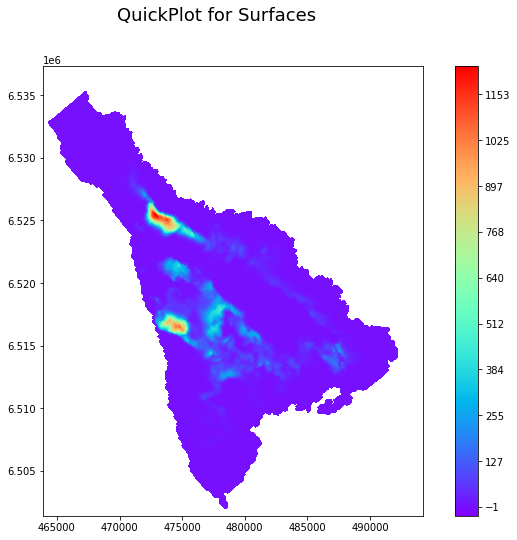

In [20]:
# Visualize aggregated surface with xtgeo
bytestring = BytesIO(s.blob)
xtgeo_surface = xtgeo.surface_from_file(bytestring)
xtgeo_surface.quickplot()

## Class: SurfaceCollection

A set of surface results. Inherits from collections.Sequence and acts as a list of `Surface` objects.

methods:
- aggregate()

In [21]:
for s in surfaces[1:3]:
    print(s.name)
    print(s.realization_id)

2022-03-16 12:09:50 DEBUG    is_token_expired() is starting
2022-03-16 12:09:50 DEBUG    is_expired: False


### SurfaceCollection.aggregate()

Params:
- operations: string || string[]

Returns: blob if one operation is provided, dictionary of blobs if multiple operations:
```
Dict
{
    OPERATION: BLOB
}
```

In [24]:
surfaces = my_case.get_surfaces(
    surface_name="Aasgard Fm. Top",
    tag_name="structural_model",
    iteration_id=0
)

print(len(surfaces))

# One operation
mean = surfaces.aggregate("MEAN")

# Multiple
#aggs = surfaces.aggregate(["MEAN", "MIN", "MAX"])
#mean = aggs["MEAN"]

2022-03-16 12:23:15 DEBUG    is_token_expired() is starting
2022-03-16 12:23:15 DEBUG    is_expired: False
2022-03-16 12:23:15 DEBUG    is_token_expired() is starting
2022-03-16 12:23:15 DEBUG    is_expired: False


201


2022-03-16 12:23:18 DEBUG    is_token_expired() is starting
2022-03-16 12:23:18 DEBUG    is_expired: False


2022-03-16 12:10:10 INFO     Ran init of xtgeo.common.sys, ID is 5361769424
2022-03-16 12:10:10 INFO     Checking file...
2022-03-16 12:10:10 INFO     Signature is irap binary
2022-03-16 12:10:10 INFO     Enter function xtgeo.surface._regsurf_import
2022-03-16 12:10:10 INFO     Start __init__ method for RegularSurface object 5353019024
2022-03-16 12:10:10 INFO     xtgeo.plot.xtmap.Map
2022-03-16 12:10:10 INFO     Ran __init__ ...
2022-03-16 12:10:10 INFO     xtgeo.plot.xtmap.Map
2022-03-16 12:10:10 INFO     Infotext is <None>
2022-03-16 12:10:10 INFO     Definition of a colormap from string name: rainbow
2022-03-16 12:10:10 INFO     Defining colormap
2022-03-16 12:10:10 INFO     Valid color maps: ['Accent', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'Dark2', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'Paired', 'Pastel1', 'Pastel2', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Set1', 'Set2', 'Set3', 'Spectral', 'Wis

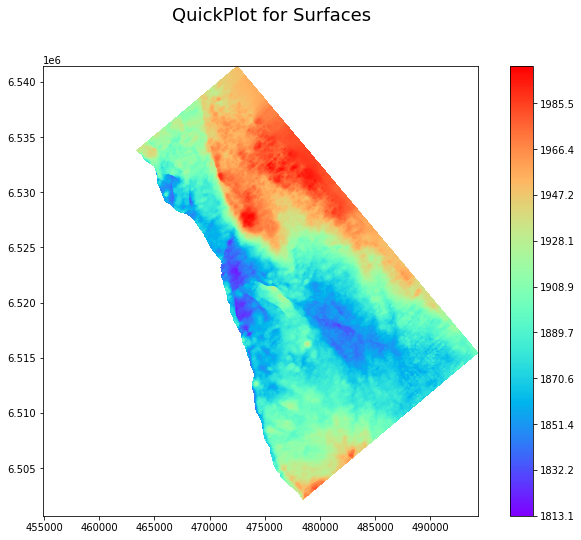

In [23]:
# Visualize aggregated surface with xtgeo
bytestring = BytesIO(mean)
xtgeo_surface = xtgeo.surface_from_file(bytestring)
xtgeo_surface.quickplot()

## Class: Surface
Represents a surface in Sumo. 

Some of the surface meta data is accessible as attributes, the rest can be extracted from `Surface.meta_data`

Attributes:
- meta_data: dict
- sumo_id:uuid
- iteration_id: number
- realization_id: number
- name: string
- relative_path: string
- full_path: string
- aggregation: string

Properties:
- blob: blob

In [ ]:
s = surfaces[0]

# Get meta_data and blob
meta_data = s.meta_data
blob = s.blob

# Get data from meta_data attribute
file_path = meta_data["file"]["relative_path"]

# Or use attribute
file_path = s.relative_path

## Example: process of finding a surface from case


In [ ]:
my_case = sumo.get_case_by_id("81a57a32-37e7-06bc-924e-6710ba6e59b0")

# Get iteration
iterations = my_case.get_iterations()

i = list(iterations.keys())[0]


# Get realization
realizations = my_case.get_realizations(
    iteration_id=i
)

r = list(realizations.keys())[0]


# Get tag names
tag_names = my_case.get_surface_tag_names(
    iteration_id=i,
    realization_id=r
)

t = list(tag_names.keys())[0]


# Get surface name
surface_names = my_case.get_surface_names(
    tag_name=t,
    iteration_id=i,
    realization_id=r
)

n = list(surface_names.keys())[0]


# Get surface
surfaces = my_case.get_surfaces(
    surface_name=n,
    tag_name=t,
    iteration_id=i,
    realization_id=r
)

s = surfaces[0]

# Visualize with xtgeo
bytestring = BytesIO(s.blob)
xtgeo_surface = xtgeo.surface_from_file(bytestring)
xtgeo_surface.quickplot()

# Print info
print(f"Case: {my_case.case_name}")
print(f"Iteration: {i}")
print(f"Realization: {r}")
print(f"Surface name: {n}")
print(f"Tag name: {t}")